## Defining functions to calculate expected utility given different contract parameters

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def contract(n, C, F, mu, sig):
    '''
    n = no. participants
    C = contribution percentage
    F = service fee percentage
    mu = mean of income dist
    sig = sd of income dist
    '''
    mu_new = (1 - C*F) * mu
    sig_new = np.sqrt(((1 - C**2) + (1 - F)**2 * C**2 / n) * sig**2)
    return mu_new, sig_new

In [5]:
def expected_utility(lam, mu, sig):
    '''
    lam = risk aversion coef
    mu = mean of income dist
    sig = sd of income dist
    '''
    return 1 - np.exp(-lam * (mu - lam*sig**2 / 2))

## Testing sensitivity to number of participants

In [183]:
n = np.arange(2,21,1)
C = 0.1
F = 0.05
mu = 1000
sig = 50
lam = 1

In [184]:
mu_new, sig_new = contract(n, C, F, mu, sig)

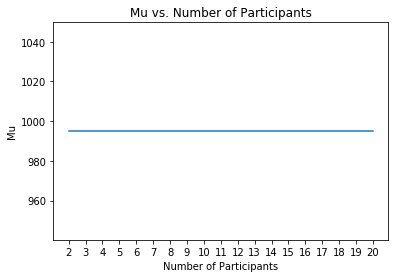

In [185]:
plt.plot(n, mu_new * np.ones(len(sig_new)))
plt.title('Mu vs. Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Mu')
plt.xticks(n)
plt.show()

Mu stays constant as number of participants increases.

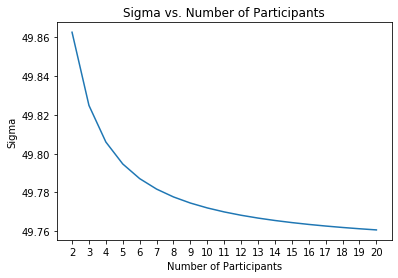

In [186]:
plt.plot(n, sig_new)
plt.title('Sigma vs. Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Sigma')
plt.xticks(n)
plt.show()

We see that sigma decreases as the number of participants increases. It decreases at the fastest rate between 2-6 participants and decreases at a slower rate as number of participants increases beyond 6.

In [187]:
util_contract = expected_utility(lam, mu_new, sig_new)
util_orig = expected_utility(lam, mu, sig)

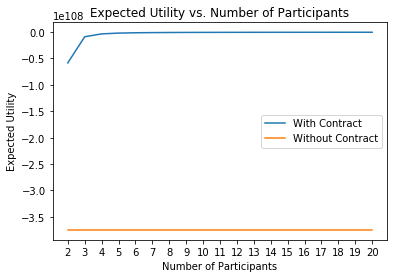

In [188]:
plt.plot(n, util_contract)
plt.plot(n, util_orig*np.ones(len(n)))
plt.title('Expected Utility vs. Number of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Expected Utility')
plt.xticks(n)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

We see that expected utility is higher with the contract than without the contract for all numbers of participants greater than 1. Expected utility with the contract also increases as the number of participants increases, but at a much slower rate for numbers of participants greater than 4.

## Testing sensitivity to pool contribution percentage

In [189]:
n = 3
C = np.arange(0.05, 0.55, 0.05)
F = 0.05
mu = 1000
sig = 50
lam = 1

In [190]:
mu_new, sig_new = contract(n, C, F, mu, sig)

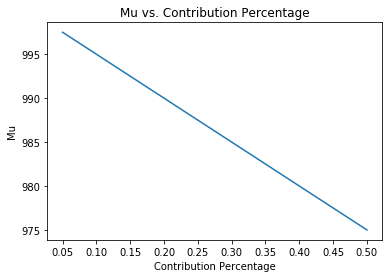

In [125]:
plt.plot(C, mu_new)
plt.title('Mu vs. Contribution Percentage')
plt.xlabel('Contribution Percentage')
plt.ylabel('Mu')
plt.xticks(C)
plt.show()

Mu decreases linearly as contribution percentage increases.

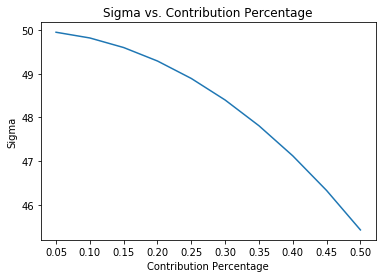

In [126]:
plt.plot(C, sig_new)
plt.title('Sigma vs. Contribution Percentage')
plt.xlabel('Contribution Percentage')
plt.ylabel('Sigma')
plt.xticks(C)
plt.show()

Sigma decreases as contribution percentage increases, at a faster rate for larger contribution percentages.

In [127]:
util_contract = expected_utility(lam, mu_new, sig_new)
util_orig = expected_utility(lam, mu, sig)

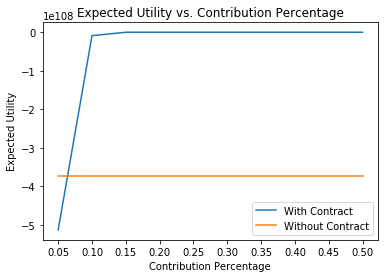

In [129]:
plt.plot(C, util_contract)
plt.plot(C, util_orig*np.ones(len(C)))
plt.title('Expected Utility vs. Contribution Percentage')
plt.xlabel('Contribution Percentage')
plt.ylabel('Expected Utility')
plt.xticks(C)
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

We see that expected utility is higher with the contract than without the contract for all contribution percentages greater than 0.05. Expected utility with the contract also increases as the number of participants increases, but at a much slower rate for contribution percentages greater than 0.1.

## Testing sensitivity to service fee percentage

In [130]:
n = 3
C = 0.1
F = np.arange(0.01, 0.21, 0.01)
mu = 1000
sig = 50
lam = 1

In [131]:
mu_new, sig_new = contract(n, C, F, mu, sig)

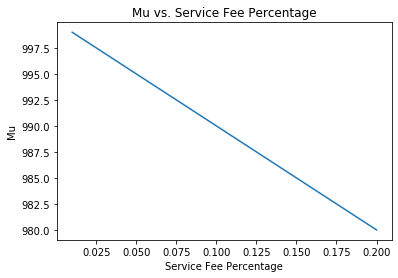

In [133]:
plt.plot(F, mu_new)
plt.title('Mu vs. Service Fee Percentage')
plt.xlabel('Service Fee Percentage')
plt.ylabel('Mu')
plt.show()

Mu decreases linearly as service fee percentage increases.

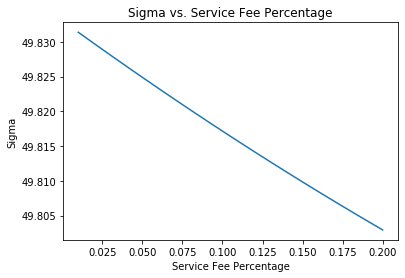

In [134]:
plt.plot(F, sig_new)
plt.title('Sigma vs. Service Fee Percentage')
plt.xlabel('Service Fee Percentage')
plt.ylabel('Sigma')
plt.show()

Sigma decreases close to linearly as service fee percentage increases.

In [135]:
util_contract = expected_utility(lam, mu_new, sig_new)
util_orig = expected_utility(lam, mu, sig)

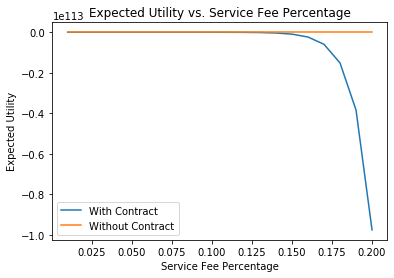

In [136]:
plt.plot(F, util_contract)
plt.plot(F, util_orig*np.ones(len(F)))
plt.title('Expected Utility vs. Service Fee Percentage')
plt.xlabel('Service Fee Percentage')
plt.ylabel('Expected Utility')
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

We see that expected utility remains around the same with or without the contract until service fee percentage reaches 0.13, which is when expected utility experiences an exponential decrease as service fee percentage increases.

## Testing sensitivity to starting mu

In [254]:
n = 3
C = 0.1
F = 0.05
mu = np.arange(1000,2600,50)
sig = 50
lam = 1

In [255]:
mu_new = np.zeros(len(mu))
sig_new = np.zeros(len(mu))

for i in range(len(mu)):
    mu_temp, sig_temp = contract(n, C, F, mu[i], sig)
    mu_new[i] = mu_temp
    sig_new[i] = sig_temp

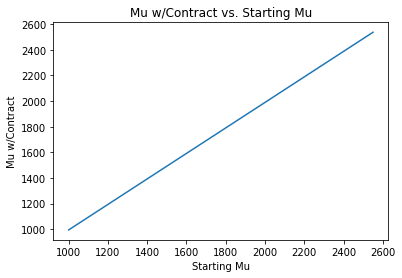

In [256]:
plt.plot(mu, mu_new)
plt.title('Mu w/Contract vs. Starting Mu')
plt.xlabel('Starting Mu')
plt.ylabel('Mu w/Contract')
plt.show()

Mu with the contract increases linearly as the starting mu increases.

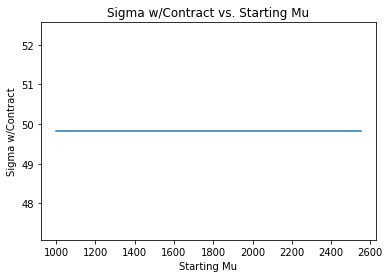

In [257]:
plt.plot(mu, sig_new)
plt.title('Sigma w/Contract vs. Starting Mu')
plt.xlabel('Starting Mu')
plt.ylabel('Sigma w/Contract')
plt.show()

Sigma with the contract is independent of changes in the starting mu.

In [258]:
util_contract = expected_utility(lam, mu_new, sig_new)
util_orig = expected_utility(lam, mu, sig)

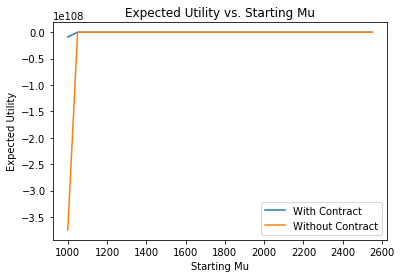

In [259]:
plt.plot(mu, util_contract)
plt.plot(mu, util_orig)
plt.title('Expected Utility vs. Starting Mu')
plt.xlabel('Starting Mu')
plt.ylabel('Expected Utility')
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Expected utility increases as starting mu increases from 1000 to 1100 with and without the contract, although the expected utility without the contract is lower than with the contract with a starting mu value of 1000. After a starting mu of 1100, expected utility does not increase any further.

## Testing sensitivity to starting sigma

In [260]:
n = 3
C = 0.1
F = 0.05
mu = 1000
sig = np.arange(20,51,1)
lam = 1

In [261]:
mu_new = np.zeros(len(sig))
sig_new = np.zeros(len(sig))

for i in range(len(sig)):
    mu_temp, sig_temp = contract(n, C, F, mu, sig[i])
    mu_new[i] = mu_temp
    sig_new[i] = sig_temp

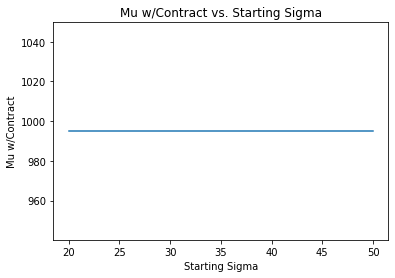

In [262]:
plt.plot(sig, mu_new)
plt.title('Mu w/Contract vs. Starting Sigma')
plt.xlabel('Starting Sigma')
plt.ylabel('Mu w/Contract')
plt.show()

Mu with the contract is independent of changes in the starting sigma.

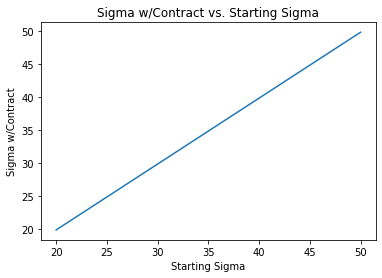

In [263]:
plt.plot(sig, sig_new)
plt.title('Sigma w/Contract vs. Starting Sigma')
plt.xlabel('Starting Sigma')
plt.ylabel('Sigma w/Contract')
plt.show()

Sigma with the contract increases linearly as starting sigma increases.

In [264]:
util_contract = expected_utility(lam, mu_new, sig_new)
util_orig = expected_utility(lam, mu, sig)

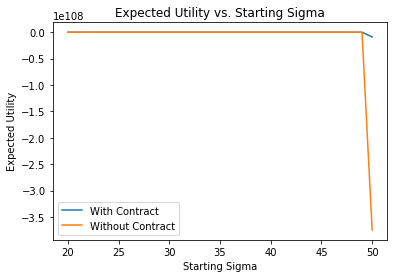

In [265]:
plt.plot(sig, util_contract)
plt.plot(sig, util_orig)
plt.title('Expected Utility vs. Starting Sigma')
plt.xlabel('Starting Sigma')
plt.ylabel('Expected Utility')
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Expected utility remains constant with and without the contract up until a starting sigma value of 49. At this value of sigma, expected utility quickly decreases. Expected utility decreases at a faster rate without the contract than with it.

## Testing sensitivity to lambda (risk aversion coefficient)

In [270]:
n = 3
C = 0.1
F = 0.05
mu = 1000
sig = 50
lam = np.arange(0.6, 1.3, 0.1)

In [271]:
mu_new, sig_new = contract(n, C, F, mu, sig)

In [272]:
util_contract = expected_utility(lam, mu_new, sig_new)
util_orig = expected_utility(lam, mu, sig)

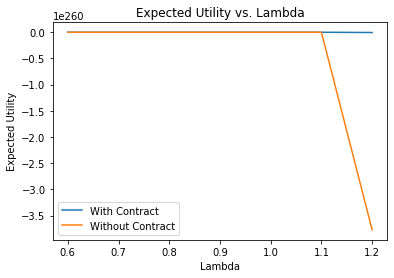

In [273]:
plt.plot(lam, util_contract)
plt.plot(lam, util_orig)
plt.title('Expected Utility vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Expected Utility')
plt.legend(('With Contract', 'Without Contract'),loc='best')
plt.show()

Expected utility decreases as risk aversion decreases with and without the contract. Expected utility increases at about the same rate with and without the contract until an absolute risk aversion coefficient of 1.1, where utility decreases much faster without the contract than with the contract.